In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import shapiro

In [2]:
heading=['Simple-Random','Systematic','Cluster','Stratified','Convenience']
ans=pd.DataFrame(columns=heading, index=['SVM','Logistic Regression','Decision Tree','Random Forest','Naive Bayes'])

In [3]:
data=pd.read_csv('Creditcard_data.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data['Class'].value_counts()

Class
0    763
1      9
Name: count, dtype: int64

<Axes: title={'center': 'Class Distribution'}, xlabel='Class', ylabel='Count'>

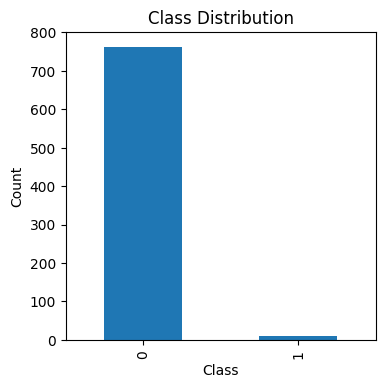

In [6]:
plt.figure(figsize=(4,4))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
data['Class'].value_counts().plot(kind='bar')

In [7]:
X=data.drop(columns={'Class'},axis=1)
y=data['Class']

In [8]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42)

In [10]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
print('Training Accuracy:',metrics.accuracy_score(y_train,model.predict(X_train))*100)
print('Testing Accuracy:',metrics.accuracy_score(y_test,model.predict(X_test))*100)

Training Accuracy: 100.0
Testing Accuracy: 99.34640522875817


In [11]:
df=pd.DataFrame(X_sm)
df['Class']=y_sm

In [12]:
# Simple Random Sampling

z=1.96
p=0.5
E=0.05
sample_size=m.ceil((z**2*p*(1-p))/(E**2))

samples=[]
s1=df.sample(n=sample_size,random_state=0)
samples.append(s1)
s1['Class'].value_counts()

Class
0    200
1    185
Name: count, dtype: int64

In [13]:
# Cluster Sampling

z=1.96
p=0.5
E=0.05
C=1.5
sample_size=round((z**2*p*(1-p))/((E/C)**2))
clusters=2
df_new=df
N = len(df)
K = int(N/sample_size)
data = None
for k in range(K):
    sample_k = df_new.sample(sample_size)
    sample_k["cluster"] = np.repeat(k,len(sample_k))
    df_new = df_new.drop(index = sample_k.index)
    data = pd.concat([data,sample_k],axis = 0)

random_chosen_clusters = np.random.randint(0,K,size = clusters)
s3 = data[data.cluster.isin(random_chosen_clusters)]
s3.drop(['cluster'], axis=1, inplace=True)
samples.append(s3)   
s3['Class'].value_counts()  

Class
0    449
1    415
Name: count, dtype: int64

In [14]:

#Systematic Sampling

n=len(df) 
k=int(m.sqrt(n)) 
s2=df.iloc[::k] 
samples.append(s2)
s2['Class'].value_counts()

Class
0    20
1    20
Name: count, dtype: int64

In [15]:
# Stratefied Sampling

z=1.96
p=0.5
E=0.05
S=0.7
sample_size=round((z**2*p*(1-p))/((E/S)**2))
s4=df.groupby('Class', group_keys=False).apply(lambda x: x.sample(sample_size))
samples.append(s4)
s4['Class'].value_counts()

Class
0    188
1    188
Name: count, dtype: int64

In [16]:
# Convenience Sampling

s5=df.head(350)
samples.append(s5)
s5['Class'].value_counts()

Class
0    347
1      3
Name: count, dtype: int64

In [17]:
# Check goodness of each sample using Shapiro-Wilk test

for i in range(5):
  print(shapiro(samples[i]))

ShapiroResult(statistic=0.1743699312210083, pvalue=0.0)
ShapiroResult(statistic=0.16341418027877808, pvalue=0.0)
ShapiroResult(statistic=0.18224209547042847, pvalue=0.0)
ShapiroResult(statistic=0.1739422082901001, pvalue=0.0)
ShapiroResult(statistic=0.09570705890655518, pvalue=0.0)


c:\Users\Hardik Garg\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
# Applying Models

for i in range(5):
  j=0
  x_s=samples[i].drop('Class',axis=1)
  y_s=samples[i]['Class']
  xtrain, xtest, y_train, y_test = train_test_split(x_s ,y_s , random_state=104,test_size=0.25, shuffle=True)
  
  # Applying SVM

  clf = SVC(kernel='rbf')
  clf.fit(xtrain, y_train) 
  y_pred=clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j,i]=acc*100

  # Applying Logistic Regression

  classifier = LogisticRegression(random_state = 0,max_iter=2000)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+1,i]=acc*100
  
  # Applying Decision Tree
  classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+2,i]=acc*100

  # Applying RandomForest Classifier

  clf = RandomForestClassifier(n_estimators = 100) 
  clf.fit(xtrain, y_train)
  y_pred = clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+3,i]=acc*100

  # Applying Naive bayes
  
  model = GaussianNB()
  model.fit(xtrain,y_train)
  predicted= model.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+4,i]=acc*100

print(ans)

                    Simple-Random Systematic Cluster Stratified Convenience
SVM                     72.164948  69.444444    50.0  67.021277   97.727273
Logistic Regression     86.597938  87.962963    60.0  92.553191   97.727273
Decision Tree           88.659794  95.833333    80.0  93.617021   95.454545
Random Forest           98.969072  99.537037    60.0   97.87234   97.727273
Naive Bayes             98.969072  99.537037    60.0   97.87234   97.727273


In [19]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

ans.style.apply(highlight_max, axis=1)

,Simple-Random,Systematic,Cluster,Stratified,Convenience
SVM,72.164948,69.444444,50.000000,67.021277,97.727273
Logistic Regression,86.597938,87.962963,60.000000,92.553191,97.727273
Decision Tree,88.659794,95.833333,80.000000,93.617021,95.454545
Random Forest,98.969072,99.537037,60.000000,97.872340,97.727273
Naive Bayes,98.969072,99.537037,60.000000,97.872340,97.727273
